### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [22]:
%load_ext autoreload
%autoreload 2

I am being executed!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***

# 1) Load data into Python



In [12]:
file_names = ['..\\data\\BH10_raw_rgt-baseline_S29-34.xlsx'] 

df = rgt.load_data(file_names)

df.head()

I am being executed!


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_ClassicA,2022-02-14,16:00:43,9,0.0,1,0.0,NaN,30,1.0,...,1,0,30,0,0,0,0,0,0,0
1,rGT_ClassicA,2022-02-14,16:00:43,9,0.0,1,0.0,NaN,30,2.1,...,0,0,0,1,2,0,0,0,0,0
2,rGT_ClassicA,2022-02-14,16:00:43,9,0.0,1,0.0,NaN,30,2.0,...,0,0,0,0,0,0,0,0,0,0
3,rGT_ClassicA,2022-02-14,16:00:43,9,0.0,1,0.0,NaN,30,3.1,...,0,0,0,1,5,0,0,0,0,0
4,rGT_ClassicA,2022-02-14,16:00:43,9,0.0,1,0.0,NaN,30,3.1,...,0,0,0,1,1,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [3]:
classic_males = [41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56] 
classic_females = list(range(9,25))

cued_males = [33,34,35,36,37,38,39,40,57,58,59,60,61,62,63,64]
cued_females = [1,2,3,4,5,6,7,8,25,26,27,28,29,30,31,32]

group_names = {0: 'classic males',
              1: 'cued males',
              2: 'classic females',
              3: 'cued females'} 

group_list = [classic_males,cued_males,classic_females,cued_females]

title = 'rGT baseline' #for plotting

startsess = 30 #first session you would like to include in figures
endsess = 34 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [4]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2022-02-14  30          62.1
         2022-02-15  31          56.1
         2022-02-16  32          71.0
         2022-02-17  33          61.1
         2022-02-18  34          51.0
2        2022-02-14  30         125.0
         2022-02-15  31         128.0
         2022-02-16  32         117.0
         2022-02-17  33         139.0
         2022-02-18  34         124.0
3        2022-02-14  30          59.1
         2022-02-15  31          75.0
         2022-02-16  32          66.0
         2022-02-17  33          70.1
         2022-02-18  34          71.0
4        2022-02-14  30          67.0
         2022-02-15  31          65.0
         2022-02-16  32          63.0
         2022-02-17  33          70.0
         2022-02-18  34          82.0
5        2022-02-14  30          58.0
         2022-02-15  31          60.0
         2022-02-16  32          76.0
         2022-02-17  33          74.0
         2022-02-18  34          61.1
6        2022-02-14  

### Drop/edit session numbers

In [4]:
df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [33], subs = [10,11,12])

### Check that you dropped/edited the desired session(s)

In [7]:
rgt.check_sessions(df2) 

Subject  StartDate   Session
1        2022-02-14  30          62.1
         2022-02-15  31          56.1
         2022-02-16  32          71.0
         2022-02-17  33          61.1
         2022-02-18  34          51.0
2        2022-02-14  30         125.0
         2022-02-15  31         128.0
         2022-02-16  32         117.0
         2022-02-17  33         139.0
         2022-02-18  34         124.0
3        2022-02-14  30          59.1
         2022-02-15  31          75.0
         2022-02-16  32          66.0
         2022-02-17  33          70.1
         2022-02-18  34          71.0
4        2022-02-14  30          67.0
         2022-02-15  31          65.0
         2022-02-16  32          63.0
         2022-02-17  33          70.0
         2022-02-18  34          82.0
5        2022-02-14  30          58.0
         2022-02-15  31          60.0
         2022-02-16  32          76.0
         2022-02-17  33          74.0
         2022-02-18  34          61.1
6        2022-02-14  

## Data processing

### Calculate variables for each rat


In [5]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum 

,30P1,30P2,30P3,30P4,31P1,31P2,31P3,31P4,32P1,32P2,...,trial30,trial31,trial32,trial33,trial34,prem30,prem31,prem32,prem33,prem34
1,1.63934,14.7541,83.6066,0,0,17.8571,82.1429,0,0,19.7183,...,62.1,56.1,71.0,61.1,51.0,40.196078,45.631068,29.702970,34.065934,29.166667
2,0.8,95.2,4,0,0,98.4127,1.5873,0,0,95.7265,...,125.0,128.0,117.0,139.0,124.0,19.354839,20.987654,30.357143,16.265060,23.926380
3,10.3448,10.3448,72.4138,6.89655,17.3333,18.6667,57.3333,6.66667,6.06061,15.1515,...,59.1,75.0,66.0,70.1,71.0,45.871560,18.478261,23.255814,26.595745,10.126582
4,0,34.3284,0,65.6716,3.07692,27.6923,7.69231,61.5385,6.34921,22.2222,...,67.0,65.0,63.0,70.0,82.0,22.093023,28.571429,19.230769,18.604651,13.684211
5,5.17241,17.2414,46.5517,31.0345,6.66667,18.3333,58.3333,16.6667,1.31579,42.1053,...,58.0,60.0,76.0,74.0,61.1,21.621622,36.170213,24.752475,25.252525,31.034483
6,0,60,6.66667,33.3333,3.8961,53.2468,24.6753,18.1818,1.23457,54.321,...,75.0,77.0,81.0,89.1,95.0,26.470588,24.509804,15.625000,21.428571,13.636364
7,1.42857,31.4286,55.7143,11.4286,3.07692,26.1538,53.8462,16.9231,4.34783,26.087,...,74.0,67.0,70.0,66.0,64.0,7.500000,10.666667,5.405405,9.589041,13.513514
8,1.6129,64.5161,3.22581,30.6452,3.0303,51.5152,0,45.4545,5.08475,50.8475,...,67.0,66.0,61.0,70.0,61.0,27.956989,15.384615,23.750000,15.662651,18.666667
9,31.25,38.5417,28.125,2.08333,33.9806,47.5728,13.5922,4.85437,30.7692,48.0769,...,99.1,104.0,104.0,85.0,96.0,19.672131,23.529412,23.529412,21.296296,10.280374
10,1.51515,51.5152,6.06061,40.9091,1.49254,52.2388,7.46269,38.806,4.54545,48.4848,...,67.0,68.0,71.0,71.0,68.0,5.633803,8.108108,6.578947,10.126582,2.857143


In [ ]:
df_long = rgt.get_long_summary_data(df, df_sum)
df_long.head()

In [ ]:
df_long = rgt.get_risk_status_long(df_long)
df_long = rgt.get_group_long(df_long, group_list)

### Get the risk status of the rats


In [6]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1  -71.392834          2.0
2   94.869788          1.0
3  -57.319621          2.0
4  -28.330302          2.0
5  -33.583870          2.0
6   23.265968          1.0
7  -36.068239          2.0
8   17.976009          1.0
9   44.772566          1.0
10   9.621728          1.0
11  -7.663452          2.0
12  47.358412          1.0
13 -23.261848          2.0
14 -45.970961          2.0
15  32.302878          1.0
16  38.959885          1.0
17 -11.736846          2.0
18  92.485744          1.0
19  95.353069          1.0
20  92.930341          1.0
21   8.809252          1.0
22  37.140546          1.0
23  96.964819          1.0
24  99.452055          1.0
25   6.043631          1.0
26  30.040353          1.0
27 -79.572600          2.0
28  96.672409          1.0
29 -27.329986          2.0
30 -78.222662          2.0
31 -81.826462          2.0
32  66.842649          1.0
33 -89.027920          2.0
34  92.455149          1.0
35 -93.133642          2.0
36  29.826296          1.0
3

### Export your data to an Excel file 


In [11]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'group', 
                    new_file_name = 'BH10_rgt-baseline_S30-34.xlsx', asin = True)

## Run Anova on selected variables

In [ ]:
rgt.rm_anova(df_long)

In [ ]:
rgt.mixed_anova(df_long, "group")

## Calculate means and SEMs for your experimental groups



In [7]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,30P1,30P2,30P3,30P4,31P1,31P2,31P3,31P4,32P1,32P2,...,trial32,trial33,trial34,prem30,prem31,prem32,prem33,prem34,mean_risk,risk_status
classic males,7.8046,50.9446,31.0968,10.1541,11.4585,51.9225,26.8173,9.8017,8.03356,52.0386,...,89.8937,97.9625,87.8875,14.4198,18.045,17.4827,15.4133,14.5776,22.7753,1.375
cued males,2.71977,52.7177,32.1284,12.4342,3.93786,51.5251,30.9372,13.5998,2.90548,47.5707,...,87.5938,90.125,84.6375,13.6657,16.6095,17.25,18.346,15.0549,6.44363,1.375
classic females,13.9401,54.3501,17.4349,14.2748,13.9928,56.7175,14.5276,14.7621,12.9939,55.1104,...,88.5625,88.0687,81.0625,14.4681,15.9905,12.194,10.7669,11.302,37.9699,1.25
cued females,5.9147,40.5536,27.7361,25.7956,9.09152,39.4794,28.7855,22.6435,7.48729,34.859,...,75.2562,79.1562,76.2,24.2783,22.0239,21.7453,19.1697,18.8578,-9.87099,1.5625


### Calculate means and SEMS for task groups, split by risk status and/or sex

In [16]:
classic_male_risky = [subject for subject in classic_males if subject in risky]
classic_female_risky = [subject for subject in classic_females if subject in risky]

cued_male_risky = [subject for subject in cued_males if subject in risky]
cued_female_risky = [subject for subject in cued_females if subject in risky]

classic_male_optimal = [subject for subject in classic_males if subject in optimal]
classic_female_optimal = [subject for subject in classic_females if subject in optimal]

cued_male_optimal = [subject for subject in cued_males if subject in optimal]
cued_female_optimal = [subject for subject in cued_females if subject in optimal]

group_list_all = [classic_male_risky,classic_female_risky,cued_male_risky,cued_female_risky,
                  classic_male_optimal,classic_female_optimal,cued_male_optimal,cued_female_optimal]

#make sure the group names are in the same order as the group list!
group_names_all = {0:'risky classic males', 
                    1: 'risky classic females',
                    2: 'risky cued males',
                    3: 'risky cued females',
                    4: 'optimal classic males',
                    5: 'optimal classic females',
                    6: 'optimal cued males',
                    7: 'optimal cued females'}

mean_scores_all, SEM_all = rgt.get_means_sem(df_sum, group_list_all, group_names_all)


In [17]:
risky_females = np.concatenate((classic_female_risky,cued_female_risky))
optimal_females = np.concatenate((classic_female_optimal,cued_female_optimal))

risky_males = np.concatenate((classic_male_risky,cued_male_risky))
optimal_males = np.concatenate((classic_male_optimal,cued_male_optimal))

group_list_risk_sex = [risky_females,risky_males,optimal_females,optimal_males]

group_names_risk_sex = {0: 'risky females',
                       1: 'risky males',
                       2: 'optimal females',
                       3: 'optimal males'}

mean_scores_risk_sex, SEM_risk_sex = rgt.get_means_sem(df_sum, group_list_risk_sex, group_names_risk_sex)

In [18]:
classic = np.concatenate((classic_males,classic_females))
cued = np.concatenate((cued_males,cued_females))

group_list_task = [classic,cued]

group_names_task = {0: 'classic',
                   1: 'cued'}

mean_scores_task, SEM_task = rgt.get_means_sem(df_sum,group_list_task,group_names_task)

In [19]:
optimal_classic = np.concatenate((classic_male_optimal, classic_female_optimal))
risky_classic = np.concatenate((classic_male_risky, classic_female_risky))

optimal_cued = np.concatenate((cued_male_optimal,cued_female_optimal))
risky_cued = np.concatenate((cued_male_risky,cued_female_risky))

group_list_task_risk = [optimal_classic,risky_classic,optimal_cued,risky_cued]

group_names_task_risk = {0: 'optimal classic',
                       1: 'risky classic',
                        2: 'optimal cued',
                       3: 'risky cued'}

mean_scores_task_risk, SEM_task_risk = rgt.get_means_sem(df_sum,group_list_task_risk,group_names_task_risk)

# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


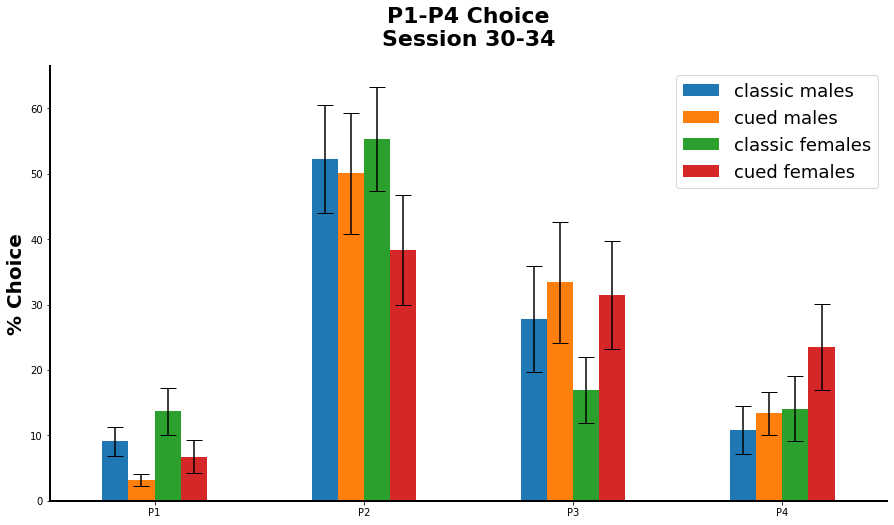

In [13]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
#plt.savefig('BH07 Choice S29-30',facecolor = 'white')

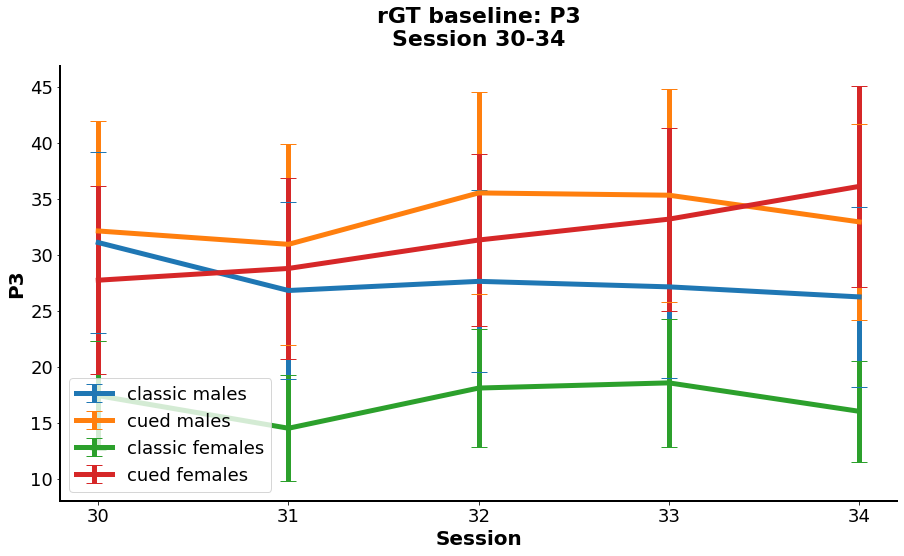

In [29]:
rgt.choice_line_plot('P3',startsess,endsess,title,mean_scores,SEM,group_names = group_names)

## Line plot of other variables


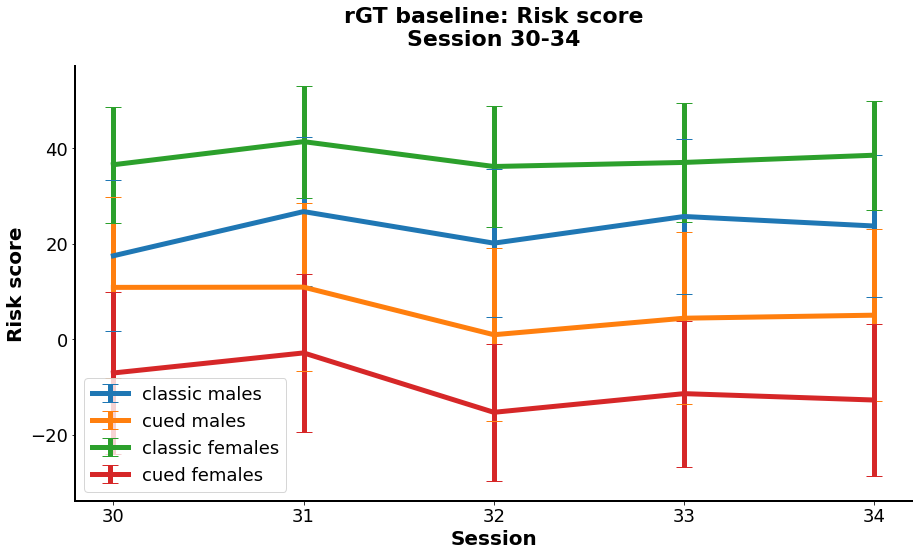

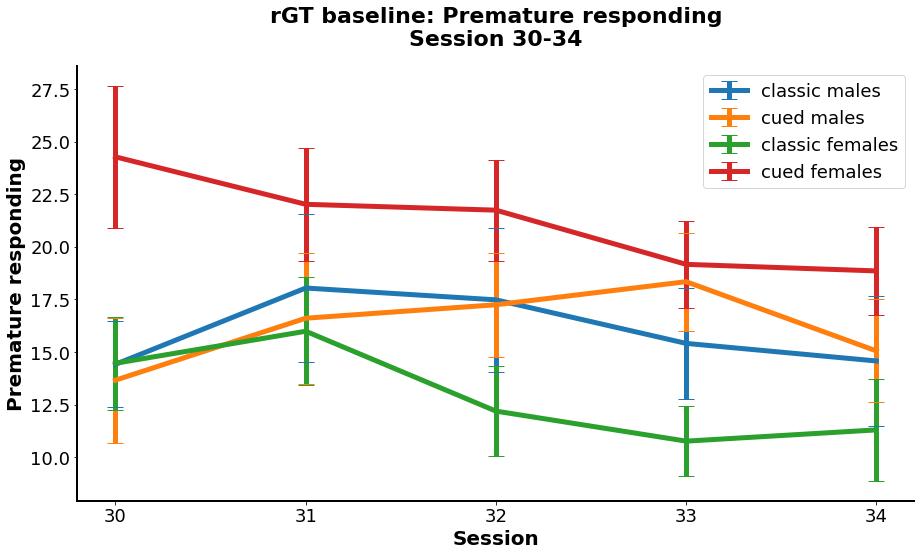

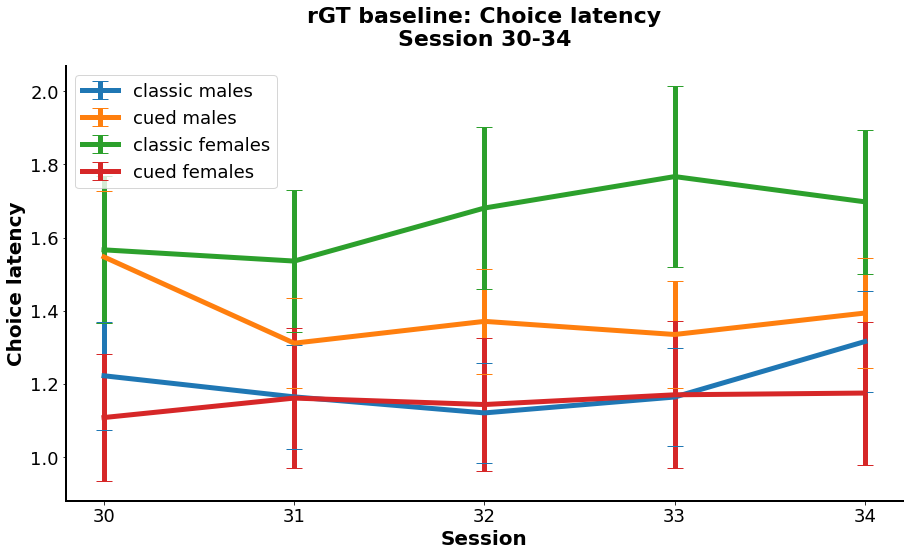

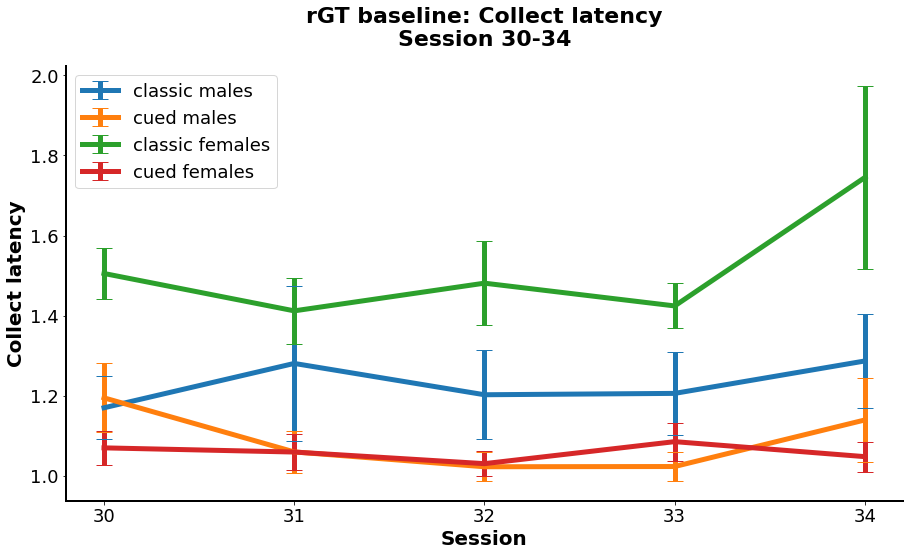

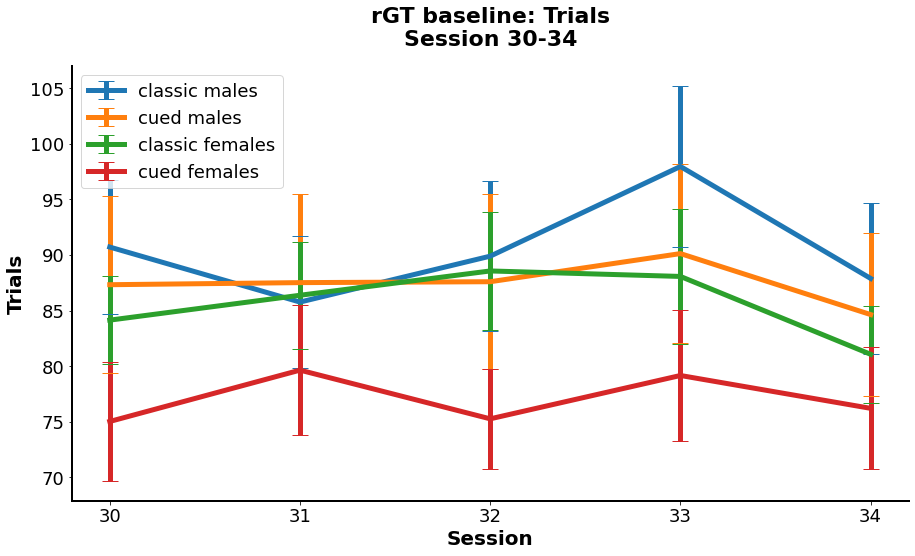

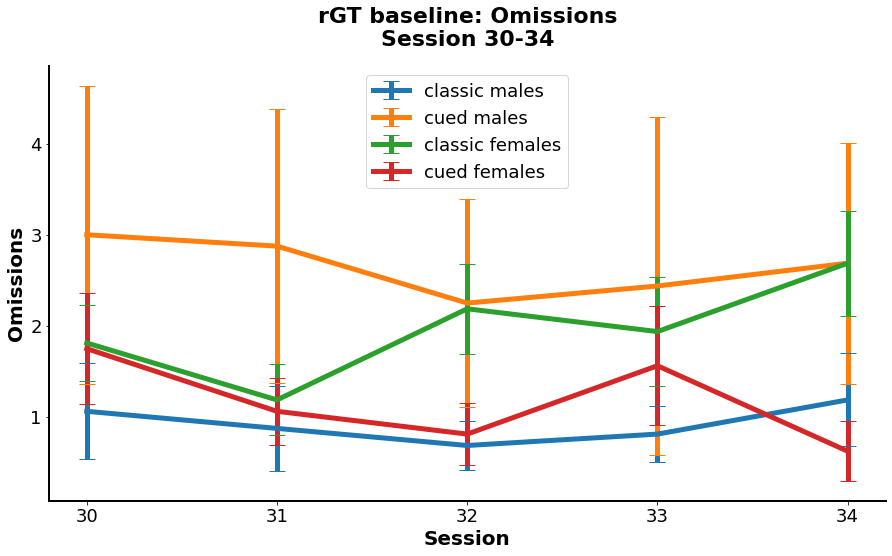

In [14]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding')

rgt.rgt_plot('choice_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Choice latency') 

rgt.rgt_plot('collect_lat', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Collect latency') 

rgt.rgt_plot('trial', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Trials') 

rgt.rgt_plot('omit', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Omissions') 

## Bar plot of other variables



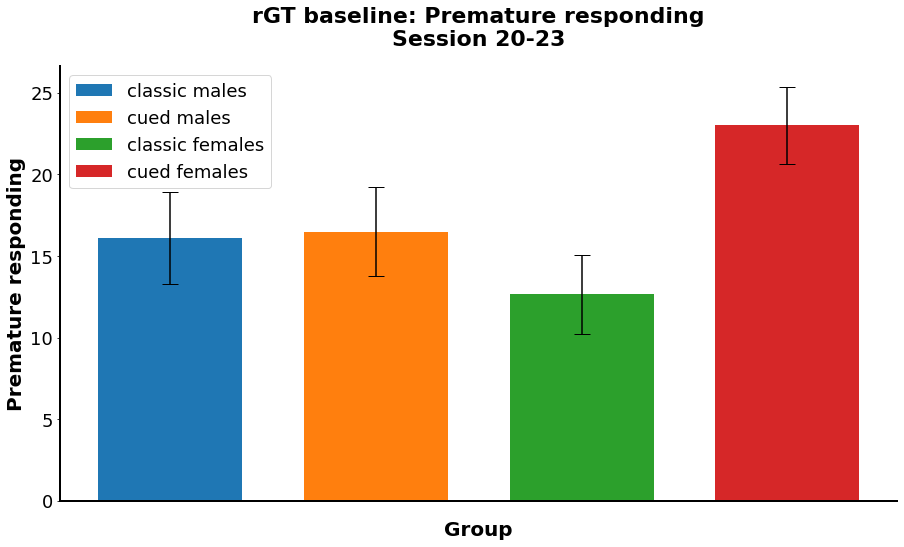

In [44]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Premature responding')

## Plotting by risk status and sex

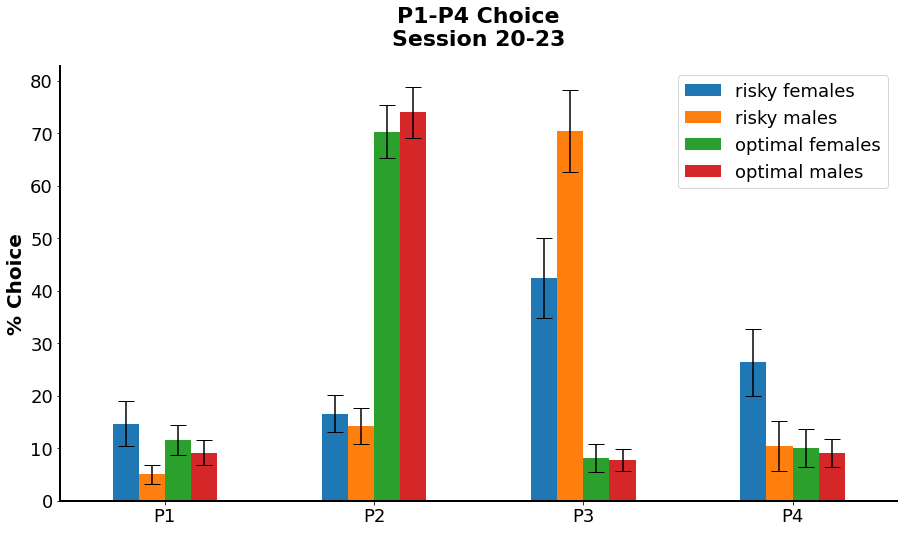

In [31]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk_sex, SEM_risk_sex)

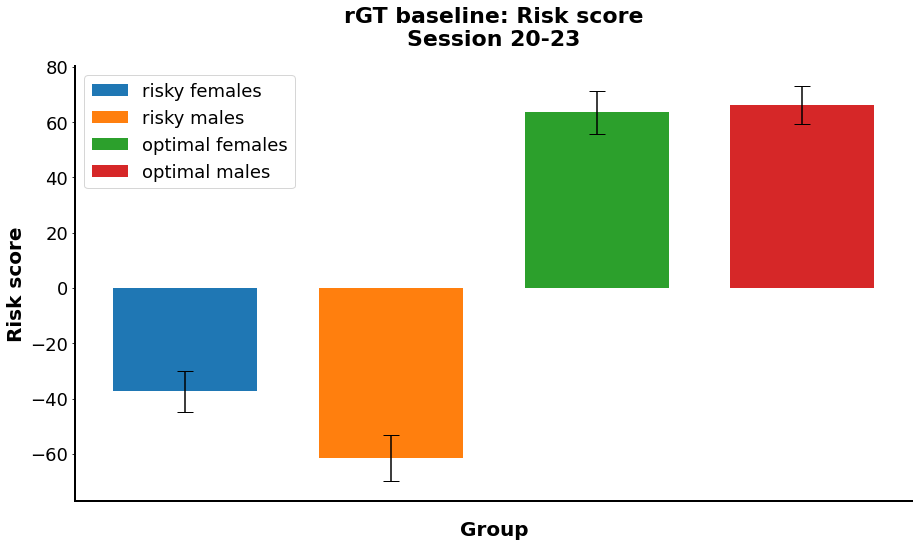

In [34]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores_risk_sex, SEM_risk_sex, 
             group_names = group_names_risk_sex, y_label = 'Risk score') 

## Plotting by task

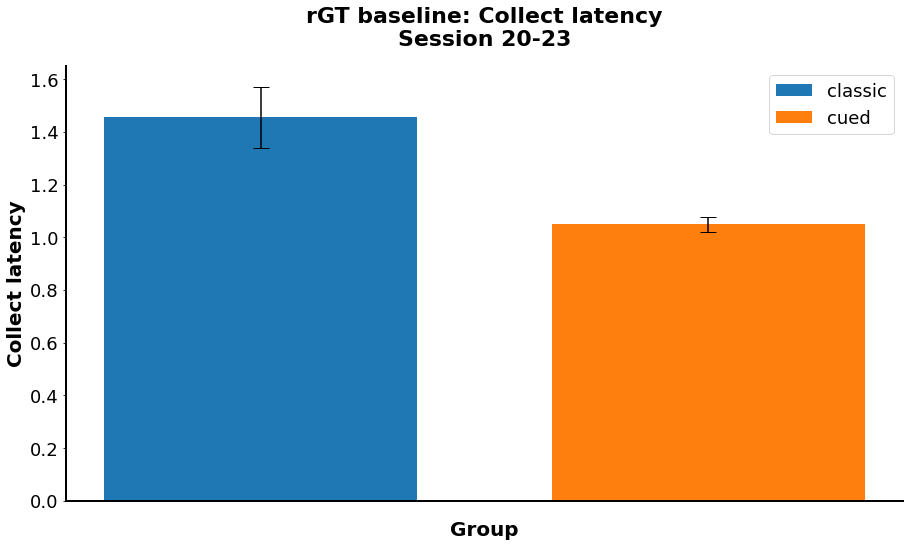

In [38]:
rgt.rgt_bar_plot('collect_lat', startsess, endsess, title, mean_scores_task, SEM_task,
                 group_names = group_names_task,y_label = 'Collect latency')

## Plotting by risk status and task

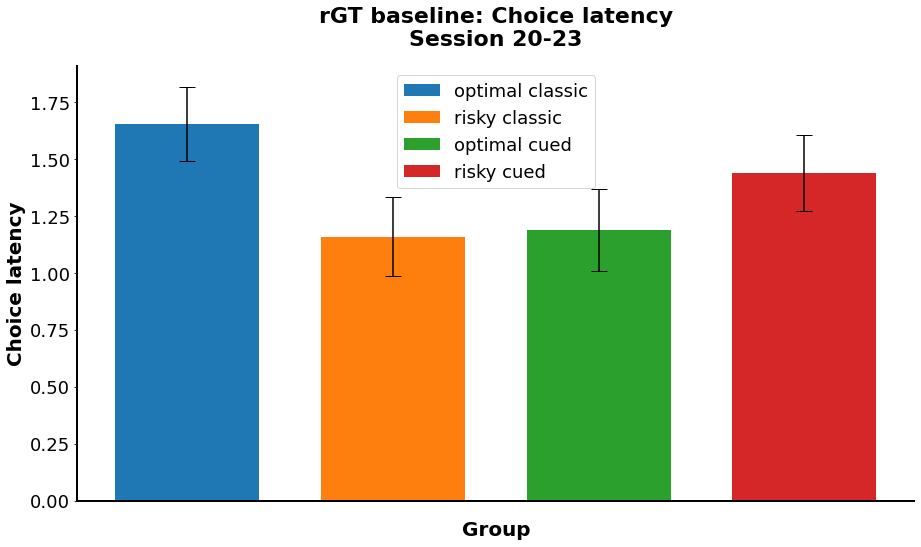

In [42]:
rgt.rgt_bar_plot('choice_lat', startsess, endsess, title, mean_scores_task_risk, SEM_task_risk,
                 group_names = group_names_task_risk,y_label = 'Choice latency')

## Plotting all groups

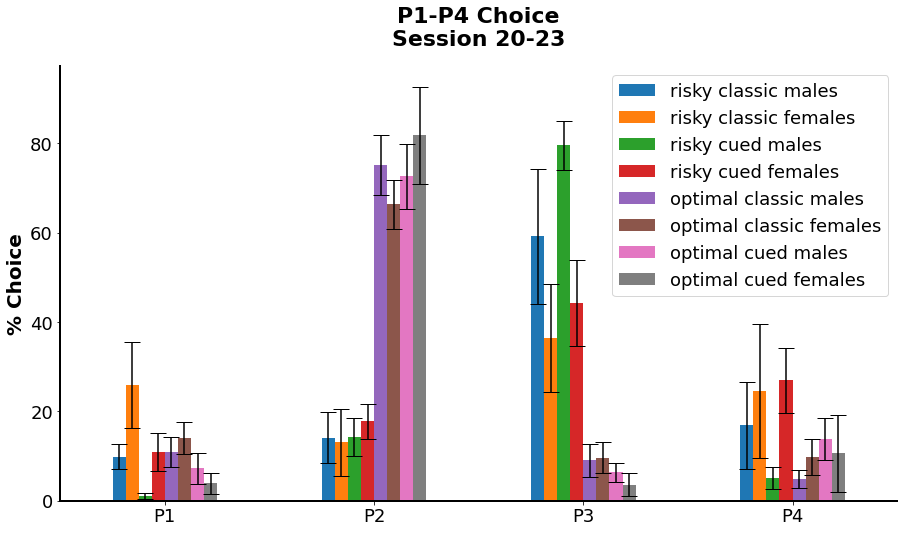

In [32]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_all, SEM_all)

In [ ]:
rgt.rgt_bar_plot('prem', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')